In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Matreyek_PTEN_VampSeq"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [2]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [3]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")

In [4]:
scoreset

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,sd,expts,se,lower_ci,upper_ci,score1,score2,score3,score4,score5,score6,score7,score8,median_w_ave,exp1_w_ave,exp2_w_ave,exp3_w_ave,exp4_w_ave,exp5_w_ave,exp6_w_ave,exp7_w_ave,exp8_w_ave,snv,abundance_class,synonymous,nonsense
0,urn:mavedb:00000013-a-1#1,NaN,NaN,p.Met1Val,1.065143,0.128434,4.0,0.064217,0.939281,1.191006,1.139622,1.116782,NaN,NaN,1.131157,0.873013,NaN,NaN,0.812850,0.849318,0.823041,NaN,NaN,0.802659,0.721626,NaN,NaN,0.0,4.0,False,False
1,urn:mavedb:00000013-a-1#2,NaN,NaN,p.Thr2Ser,0.824359,0.428489,7.0,0.161954,0.506935,1.141782,0.271362,1.229944,1.109826,1.228146,0.390083,0.460415,NaN,1.080735,0.834303,0.436220,0.875207,0.838369,0.834303,0.525840,0.518268,NaN,0.836967,1.0,3.0,False,False
2,urn:mavedb:00000013-a-1#3,NaN,NaN,p.Asn12Ile,0.298717,0.272272,7.0,0.102909,0.097019,0.500415,0.485898,0.190710,0.487930,0.676685,-0.029777,NaN,-0.034858,0.314430,0.452092,0.538292,0.396138,0.533358,0.592458,0.369006,NaN,0.268813,0.452092,1.0,1.0,False,False
3,urn:mavedb:00000013-a-1#4,NaN,NaN,p.Arg74Val,0.855027,0.318442,6.0,0.130003,0.600225,1.109829,0.679403,1.119987,1.087177,0.995354,0.288146,NaN,NaN,0.960097,0.754294,0.630357,0.824519,0.827260,0.732211,0.487763,NaN,NaN,0.776376,0.0,3.0,False,False
4,urn:mavedb:00000013-a-1#5,NaN,NaN,p.His75Ala,0.863776,0.223173,8.0,0.078903,0.709128,1.018423,1.011535,0.545051,0.852013,0.551216,0.821541,1.178525,1.004549,0.945776,0.740554,0.788377,0.559483,0.711924,0.537434,0.687006,0.872204,0.828631,0.769184,0.0,4.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,urn:mavedb:00000013-a-1#4405,NaN,NaN,p.Arg74Asn,1.158127,0.069267,2.0,0.048979,1.062129,1.254125,1.207106,NaN,1.109148,NaN,NaN,NaN,NaN,NaN,0.859731,0.881426,NaN,0.838036,NaN,NaN,NaN,NaN,NaN,0.0,4.0,False,False
4404,urn:mavedb:00000013-a-1#4406,NaN,NaN,p.Arg74Pro,1.059395,0.090548,2.0,0.064027,0.933905,1.184885,NaN,0.995368,1.123422,NaN,NaN,NaN,NaN,NaN,0.806054,NaN,0.767071,0.845037,NaN,NaN,NaN,NaN,NaN,0.0,4.0,False,False
4405,urn:mavedb:00000013-a-1#4407,NaN,NaN,p.Arg74=,1.156741,0.036999,5.0,0.016546,1.124310,1.189171,1.203074,1.141329,1.156964,NaN,1.105069,NaN,NaN,1.177269,0.861488,0.879507,0.834357,0.861488,NaN,0.792914,NaN,NaN,0.885451,0.0,4.0,True,False
4406,urn:mavedb:00000013-a-1#4408,NaN,NaN,p.Arg74Ser,0.868741,0.534848,5.0,0.239191,0.399935,1.337548,-0.051013,NaN,NaN,NaN,1.181829,1.298270,0.950399,0.964223,0.799466,0.282842,NaN,NaN,NaN,0.821587,0.931223,0.799466,0.778448,1.0,3.0,False,False


In [5]:
if "author_transcript" not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [6]:
AUTHOR_TRANSCRIPT

'NM_000314'

# Add ClinVar annotations

In [7]:
clinvar_hgvs_pro_summaries = mapping_utils.get_clinvar_summaries(clinvar_df,AUTHOR_TRANSCRIPT)

100%|██████████| 1321/1321 [00:00<00:00, 2234.32it/s]


In [8]:
scoreset_w_clinvar = pd.merge(scoreset.set_index("hgvs_pro"),clinvar_hgvs_pro_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

# Add gnomAD annotations

In [9]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [10]:
Ensembl_transcript_stable_ids

array(['ENST00000644628', 'ENST00000371953'], dtype=object)

In [11]:
gnomAD_info = mapping_utils.gather_gnomAD_info(gnomAD_df,Ensembl_transcript_stable_ids,[AUTHOR_TRANSCRIPT,])

In [12]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_info,
                                        left_index=True,right_index=True,how="left",validate="one_to_one").reset_index()

In [13]:
scoreset_processed

,hgvs_pro,accession,hgvs_nt,hgvs_splice,score,sd,expts,se,lower_ci,upper_ci,score1,score2,score3,score4,score5,score6,score7,score8,median_w_ave,exp1_w_ave,exp2_w_ave,exp3_w_ave,exp4_w_ave,exp5_w_ave,exp6_w_ave,exp7_w_ave,exp8_w_ave,snv,abundance_class,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max,gnomAD_variants_maxAC_AF,gnomAD_variants_max_spliceAI_score,gnomAD_variants_VCF_INFO
0,p.Met1Val,urn:mavedb:00000013-a-1#1,NaN,NaN,1.065143,0.128434,4.0,0.064217,0.939281,1.191006,1.139622,1.116782,NaN,NaN,1.131157,0.873013,NaN,NaN,0.812850,0.849318,0.823041,NaN,NaN,0.802659,0.721626,NaN,NaN,0.0,4.0,False,False,1.0,0.0,0.0,0.0,NM_000314.8(PTEN):c.1A>G (p.Met1Val),1.0,0.04,NaN,NaN,NaN
1,p.Thr2Ser,urn:mavedb:00000013-a-1#2,NaN,NaN,0.824359,0.428489,7.0,0.161954,0.506935,1.141782,0.271362,1.229944,1.109826,1.228146,0.390083,0.460415,NaN,1.080735,0.834303,0.436220,0.875207,0.838369,0.834303,0.525840,0.518268,NaN,0.836967,1.0,3.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p.Asn12Ile,urn:mavedb:00000013-a-1#3,NaN,NaN,0.298717,0.272272,7.0,0.102909,0.097019,0.500415,0.485898,0.190710,0.487930,0.676685,-0.029777,NaN,-0.034858,0.314430,0.452092,0.538292,0.396138,0.533358,0.592458,0.369006,NaN,0.268813,0.452092,1.0,1.0,False,False,1.0,0.0,0.0,0.0,NM_000314.8(PTEN):c.35A>T (p.Asn12Ile),1.0,0.01,NaN,NaN,NaN
3,p.Arg74Val,urn:mavedb:00000013-a-1#4,NaN,NaN,0.855027,0.318442,6.0,0.130003,0.600225,1.109829,0.679403,1.119987,1.087177,0.995354,0.288146,NaN,NaN,0.960097,0.754294,0.630357,0.824519,0.827260,0.732211,0.487763,NaN,NaN,0.776376,0.0,3.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p.His75Ala,urn:mavedb:00000013-a-1#5,NaN,NaN,0.863776,0.223173,8.0,0.078903,0.709128,1.018423,1.011535,0.545051,0.852013,0.551216,0.821541,1.178525,1.004549,0.945776,0.740554,0.788377,0.559483,0.711924,0.537434,0.687006,0.872204,0.828631,0.769184,0.0,4.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,p.Arg74Asn,urn:mavedb:00000013-a-1#4405,NaN,NaN,1.158127,0.069267,2.0,0.048979,1.062129,1.254125,1.207106,NaN,1.109148,NaN,NaN,NaN,NaN,NaN,0.859731,0.881426,NaN,0.838036,NaN,NaN,NaN,NaN,NaN,0.0,4.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4404,p.Arg74Pro,urn:mavedb:00000013-a-1#4406,NaN,NaN,1.059395,0.090548,2.0,0.064027,0.933905,1.184885,NaN,0.995368,1.123422,NaN,NaN,NaN,NaN,NaN,0.806054,NaN,0.767071,0.845037,NaN,NaN,NaN,NaN,NaN,0.0,4.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,p.Arg74=,urn:mavedb:00000013-a-1#4407,NaN,NaN,1.156741,0.036999,5.0,0.016546,1.124310,1.189171,1.203074,1.141329,1.156964,NaN,1.105069,NaN,NaN,1.177269,0.861488,0.879507,0.834357,0.861488,NaN,0.792914,NaN,NaN,0.885451,0.0,4.0,True,False,0.0,1.0,0.0,0.0,NM_000314.8(PTEN):c.222A>G (p.Arg74=),1.0,0.01,NaN,NaN,NaN
4406,p.Arg74Ser,urn:mavedb:00000013-a-1#4408,NaN,NaN,0.868741,0.534848,5.0,0.239191,0.399935,1.337548,-0.051013,NaN,NaN,NaN,1.181829,1.298270,0.950399,0.964223,0.799466,0.282842,NaN,NaN,NaN,0.821587,0.931223,0.799466,0.778448,1.0,3.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [8]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [15]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.gnomAD_variants_maxAC_AF > 0 and r.gnomAD_variants_max_spliceAI_score <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



In [19]:
sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

INVERT_SCORES = False
if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)

In [20]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 111
B/LB: 101
gnomAD: 137
synonymous: 114


(<Figure size 1200x1200 with 4 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object))

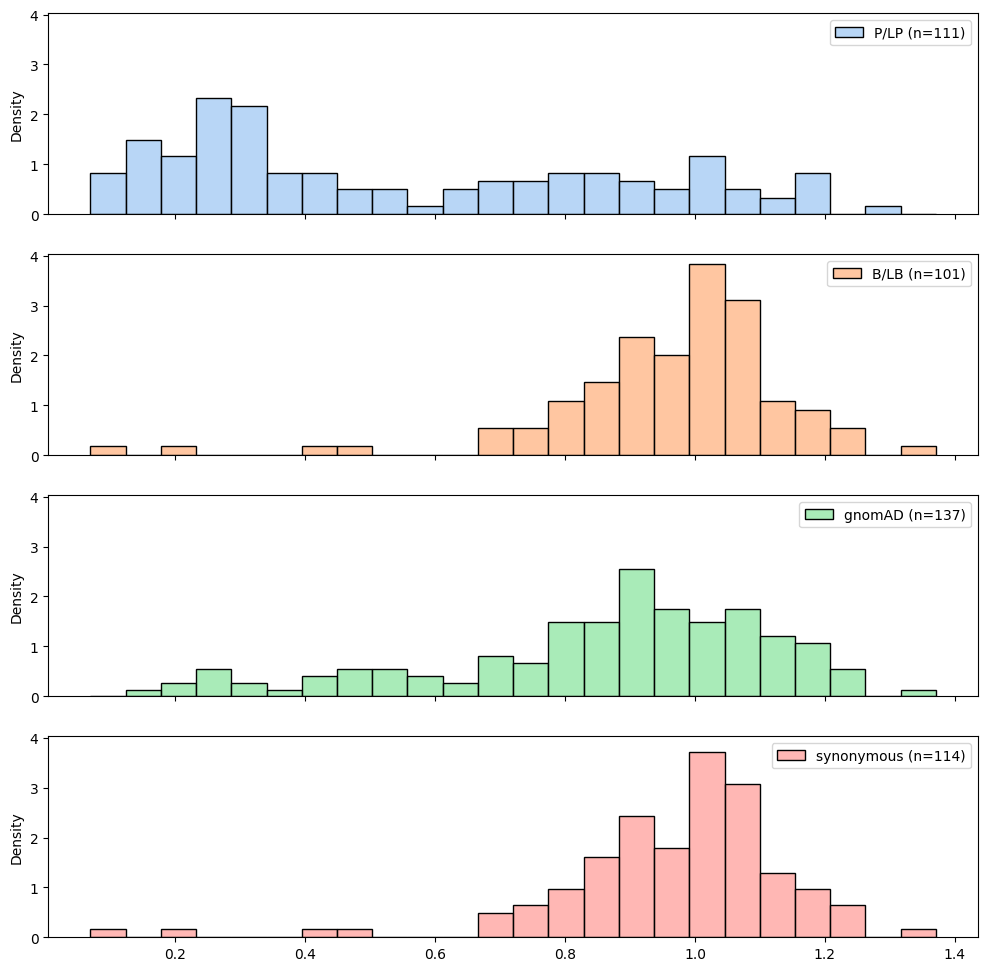

In [21]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [22]:
pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                            *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                            *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
                            *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)

In [23]:
old = joblib.load(dataset_path / "hgvs_pro.pkl")

In [24]:
clinvar_hgvs_pro_summaries[clinvar_hgvs_pro_summaries.index.isin(set(old['p_lp'].values) - set(sample_data['P/LP'].hgvs_pro.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_pro,,,,,,,
p.Asn276Ser,1,0,0,0,NM_000314.8(PTEN):c.827A>G (p.Asn276Ser),1,0.62
p.Asp310Gly,1,0,0,0,NM_000314.8(PTEN):c.929A>G (p.Asp310Gly),1,0.96
p.Gly129Val,1,0,0,0,NM_000314.8(PTEN):c.386G>T (p.Gly129Val),1,0.85
p.Leu112Val,1,0,0,0,NM_000314.8(PTEN):c.334C>G (p.Leu112Val),1,0.85
p.Lys342Asn,1,0,0,1,NM_000314.8(PTEN):c.1026G>C (p.Lys342Asn)|NM_0...,2,0.51
p.Met134Ile,2,0,0,1,NM_000314.8(PTEN):c.402G>T (p.Met134Ile)|NM_00...,3,0.00
p.Phe241Leu,1,0,1,0,NM_000314.8(PTEN):c.723T>G (p.Phe241Leu)|NM_00...,2,0.12


In [25]:
clinvar_hgvs_pro_summaries[clinvar_hgvs_pro_summaries.index.isin(set(old['b_lb'].values) - set(sample_data['B/LB'].hgvs_pro.values))]

,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_pro,,,,,,,
p.Ala39=,0,1,1,0,NM_000314.8(PTEN):c.117A>C (p.Ala39=)|NM_00031...,2,0.49
p.Arg142=,0,2,0,1,NM_000314.8(PTEN):c.426G>C (p.Arg142=)|NM_0003...,3,0.35
p.Arg15=,0,1,0,0,NM_000314.8(PTEN):c.45A>G (p.Arg15=),1,0.58
p.Gly143=,0,1,0,1,NM_000314.8(PTEN):c.429C>T (p.Gly143=)|NM_0003...,2,0.01
p.Leu152=,0,2,1,0,NM_000314.8(PTEN):c.456A>G (p.Leu152=)|NM_0003...,3,0.01
p.Pro387=,0,1,1,0,NM_000314.8(PTEN):c.1161A>G (p.Pro387=)|NM_000...,2,0.00
p.Thr366=,0,1,1,0,NM_000314.8(PTEN):c.1098A>C (p.Thr366=)|NM_000...,2,0.00
